In [1]:
from load_hpo_results import load_hpo_result_dataset
import pandas as pd
from hydra import initialize, compose

pn1 = 'full_fine_tuning_50epochs_edge_paper_final2'
pn2 = 'full_fine_tuning_50epochs_paper_final2'
final_data1 = load_hpo_result_dataset(pn1, pn2)
df = pd.DataFrame(final_data1)
df['ft_strategy'] = 'full_fine_tuning_50epochs'

# pn1 = 'full_fine_tuning_5epochs_edge_article1'
# pn2 = 'full_fine_tuning_5epochs_article1'
# final_data2 = load_hpo_result_dataset(pn1, pn2)
# df = pd.DataFrame(final_data2)
# df['ft_strategy'] = 'full_fine_tuning_5epochs'

# pn1 = 'linearprobe_50epochs_edge_paper_final2'
# pn2 = 'linearprobe_50epochs_paper_final2'
# final_data3 = load_hpo_result_dataset(pn1, pn2)
# df = pd.DataFrame(final_data3)
# df['ft_strategy'] = 'linearprobe_50epochs'

serialized_values CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2
./configs/ full_fine_tuning_50epochs_paper_final2 CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2
/Users/maximeheuillet/Desktop/robust_training/configs/HPO_results/full_fine_tuning_50epochs_paper_final2/CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.yaml
serialized_values CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2
./configs/ full_fine_tuning_50epochs_paper_final2 CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2
/Users/maximeheuillet/Desktop/robust_training/configs/HPO_results/full_fine_tuning_50epochs_paper_final2/CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.yaml
serialized_values deit_small_patch16_224.fb_in1k_uc-merced-land-use-dataset_TRADES_v2
./configs/ full_fine_tuning_50epochs_paper_final2 deit_small_patch16_224.fb_in

In [5]:
df.to_csv("FFT50epochs_HPO.csv")

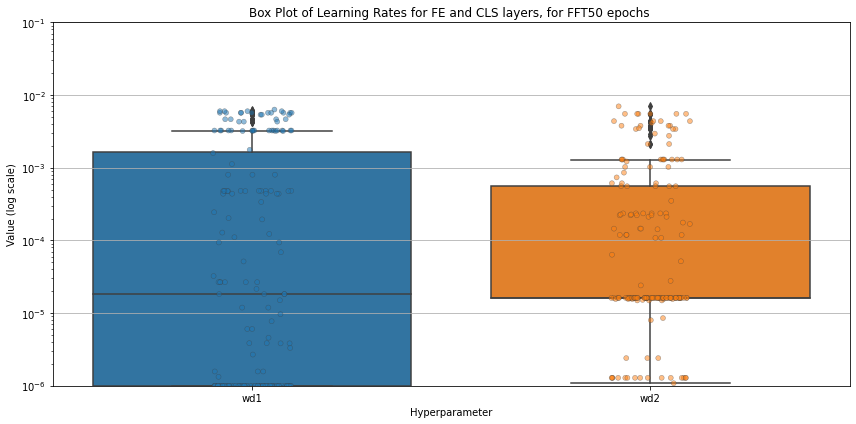

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

size = 1

df_fig = df[ df.model_size == size ]

# Filter variables of interest
variables_of_interest = ['wd1', 'wd2', 'loss_function']
data_subset = df_fig[variables_of_interest]

# Melt the dataframe to long format with respect to hyperparameters
melted_df = data_subset.melt(id_vars='loss_function', var_name='Hyperparameter', value_name='Value')

# Create the box plot with jittered dots, split by loss_function
plt.figure(figsize=(12, 6))
# sns.boxplot(x='Hyperparameter', y='Value', hue='loss_function', data=melted_df, whis=1.5)
# sns.stripplot(x='Hyperparameter', y='Value', hue='loss_function', data=melted_df,
#               dodge=True, jitter=True, alpha=0.5, marker='o', edgecolor='gray', linewidth=0.5)

sns.boxplot(x='Hyperparameter', y='Value',  data=melted_df, whis=1.5)
sns.stripplot(x='Hyperparameter', y='Value',  data=melted_df,
              dodge=True, jitter=True, alpha=0.5, marker='o', edgecolor='gray', linewidth=0.5)

plt.yscale("log")
plt.ylim(1e-6, 1e-1)
# plt.title('Box Plot of Learning Rates by Loss Function')
plt.title('Box Plot of Learning Rates for FE and CLS layers, for FFT50 epochs ')
plt.ylabel('Value (log scale)')
plt.grid(True, axis='y')
plt.tight_layout()

# Remove duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles[:2], labels[:2], title='Loss Function')

plt.show()


In [ ]:
# df = pd.concat([ df1,df2,df3 ], axis=0, ignore_index=True) 
# df = df[ df.model_size == 2 ]

nan_percentage = (df.isna().sum().sum() / df.size) * 100
print(f"Percentage of NaN values: {nan_percentage:.2f}%")

grouped_df = df.pivot_table(
    index=['ft_strategy', 'model_type', 'loss_function', 'backbone',],
    columns='dataset',
    # dropna=False
)

# Rename column levels
grouped_df.columns.set_names(["metric", "dataset"], inplace=True)

# Swap column levels → dataset becomes level 0, metric becomes level 1
grouped_df.columns = grouped_df.columns.swaplevel(0, 1)

# (Optional) Sort columns so that all metrics are grouped within each dataset
grouped_df = grouped_df.sort_index(axis=1, level=0)

# grouped_df.to_csv("./{}.csv".format(pn1))

grouped_df.shape

Percentage of NaN values: 10.67%


(240, 48)

In [3]:

# --- existing shortcuts ----------------------------------------------------
sum_scores  = grouped_df.xs('sum',  level=1, axis=1)     # (rows × 6 datasets)
geom_scores = grouped_df.xs('geom', level=1, axis=1)     # (rows × 6 datasets)

#--- 1. add the TOTAL aggregates you already computed ----------------------
grouped_df[('TOTAL', 'score_sum')]  = sum_scores.sum(axis=1)
grouped_df[('TOTAL', 'score_geom')] = geom_scores.sum(axis=1)

# --- 2. count NaNs across datasets -----------------------------------------
grouped_df[('TOTAL', 'nan_sum_cnt')]  = sum_scores.isna().sum(axis=1)
grouped_df[('TOTAL', 'nan_geom_cnt')] = geom_scores.isna().sum(axis=1)

# --- 3. rank as before ------------------------------------------------------
df_sorted = grouped_df.sort_values(('TOTAL', 'score_sum'), ascending=False)

df_sorted

dataset                                                                                               caltech101  \
metric                                                                                                    L1_acc   
ft_strategy               model_type          loss_function backbone                                               
full_fine_tuning_50epochs fully convolutional TRADES_v2     convnext_tiny.fb_in1k                       0.822000   
                          fully attention     TRADES_v2     vit_base_patch16_clip_224.laion2b_ft_in1k   0.776000   
                          fully convolutional TRADES_v2     convnext_tiny.fb_in22k                      0.805000   
                                                            robust_convnext_tiny                        0.586667   
                                                            edgenext_small.usi_in1k                     0.794000   
...                                                                                                          ...   
full_fine_tuning_5epochs  hybrid              CLASSIC_AT    mobilevit-small                                  NaN   
linearprobe_50epochs      fully convolutional CLASSIC_AT    edgenext_small.usi_in1k                          NaN   
                                                            efficientnet-b0                                  NaN   
                                                            mobilenetv3_large_100.ra_in1k                    NaN   
                          hybrid              TRADES_v2     mobilevit-small                                  NaN   

dataset                                                                                                       \
metric                                                                                                L2_acc   
ft_strategy               model_type          loss_function backbone                                           
full_fine_tuning_50epochs fully convolutional TRADES_v2     convnext_tiny.fb_in1k                      0.850   
                          fully attention     TRADES_v2     vit_base_patch16_clip_224.laion2b_ft_in1k  0.820   
                          fully convolutional TRADES_v2     convnext_tiny.fb_in22k                     0.842   
                                                            robust_convnext_tiny                       0.844   
                                                            edgenext_small.usi_in1k                    0.811   
...                                                                                                      ...   
full_fine_tuning_5epochs  hybrid              CLASSIC_AT    mobilevit-small                              NaN   
linearprobe_50epochs      fully convolutional CLASSIC_AT    edgenext_small.usi_in1k                      NaN   
                                                            efficientnet-b0                              NaN   
                                                            mobilenetv3_large_100.ra_in1k                NaN   
                          hybrid              TRADES_v2     mobilevit-small                              NaN   

dataset                                                                                                          \
metric                                                                                                 Linf_acc   
ft_strategy               model_type          loss_function backbone                                              
full_fine_tuning_50epochs fully convolutional TRADES_v2     convnext_tiny.fb_in1k                      0.778000   
                          fully attention     TRADES_v2     vit_base_patch16_clip_224.laion2b_ft_in1k  0.774000   
                          fully convolutional TRADES_v2     convnext_tiny.fb_in22k                     0.763000   
                                                            robust_convnext_tiny                       0.899000   
 

In [4]:
# Flatten the columns
df_sorted.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_sorted.columns]

df_reset = df_sorted.reset_index()
sub_df = df_reset[["ft_strategy", "model_type", "backbone", "loss_function", "TOTAL_score_sum"]]

# Now access the columns

sub_df.to_csv("./global_dataset.csv")

In [5]:
import pandas as pd
import plotly.express as px


custom_palette = ["#E69F00", "#56B4E9", "#009E73"]  # choose a set above

# ── 1.  Rank backbones by their aggregate TOTAL_score_sum ───────────────────────
backbone_order = (
    sub_df.groupby("backbone")["TOTAL_score_sum"]
          .sum()                       # sum over the 6 settings
          .sort_values(ascending=False)
          .index                       # → ordered list of backbones
          .tolist()
)

# Make the column an ordered categorical so Plotly respects the ranking
sub_df["backbone"] = pd.Categorical(
    sub_df["backbone"],
    categories=backbone_order,
    ordered=True
)

# ── 2.  Custom colours / markers ───────────────────────────────────────────────
color_map = {
    "full_fine_tuning_50epochs": custom_palette[0],#"orange",
    "full_fine_tuning_5epochs":  custom_palette[1],#"purple",
    "linearprobe_50epochs": custom_palette[2]     #"green",
}
symbol_map = {"TRADES_v2": "star", "CLASSIC_AT": "square"}

# ── 3.  Plot ───────────────────────────────────────────────────────────────────
fig = px.scatter(
    sub_df,
    width=1500, 
    height=1000,
    color_discrete_sequence=custom_palette,
    x= "backbone",
    y="TOTAL_score_sum",
    color="ft_strategy",
    symbol="loss_function",
    color_discrete_map=color_map,
    symbol_map=symbol_map,
    hover_data=["backbone", "ft_strategy", "loss_function", "TOTAL_score_sum"],
)

fig.update_layout(
    paper_bgcolor="white",   # outside the plotting area
    plot_bgcolor="white",    # inside the plotting area

    xaxis=dict(
        showgrid=True,
        gridcolor="lightgrey",
        zeroline=False       # optional: hide the heavy axis line
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="lightgrey",
        zeroline=False
    )
)

fig.update_layout(yaxis_title="Aggregate Accuracy Score")

fig.update_layout(showlegend=True)   # keep or turn off if it clutters
fig.show()

fig.write_image("./global_plot.png", scale=3  )                # upscale for higher DPI (1 = default)



/var/folders/v7/3s0lms795672_f7_mh2x6bcr0000gn/T/ipykernel_74754/3436293082.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["backbone"] = pd.Categorical(
